In [ ]:
# PROBLEMA 1
# escala de grises
# pasar a binaria (umbralado detectando bordes) → Canny
# componentes conectadas
# Para detectar la resistencia hacer relacion ancho alto ya que es algo parecido a un area rectangular horizontal

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Lucas\AppData\Local\Temp\ipykernel_11332\637269366.py:2: SyntaxWarning: invalid escape sequence '\p'
  placa = cv2.imread('TP2-PDI-\placa.png',cv2.IMREAD_GRAYSCALE)


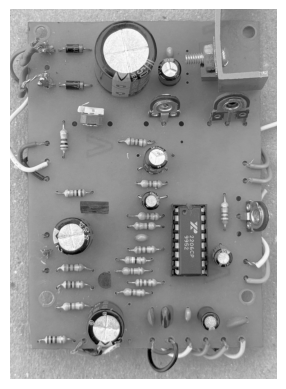

In [ ]:
# Cargamos la imagen y pasamos a RGB
#placa = cv2.imread('TP2-PDI-\placa.png',cv2.IMREAD_GRAYSCALE)
#placa_rgb = cv2.cvtColor(placa, cv2.COLOR_BGR2RGB)

#plt.imshow(placa_rgb)
#plt.axis('off')
#plt.show()




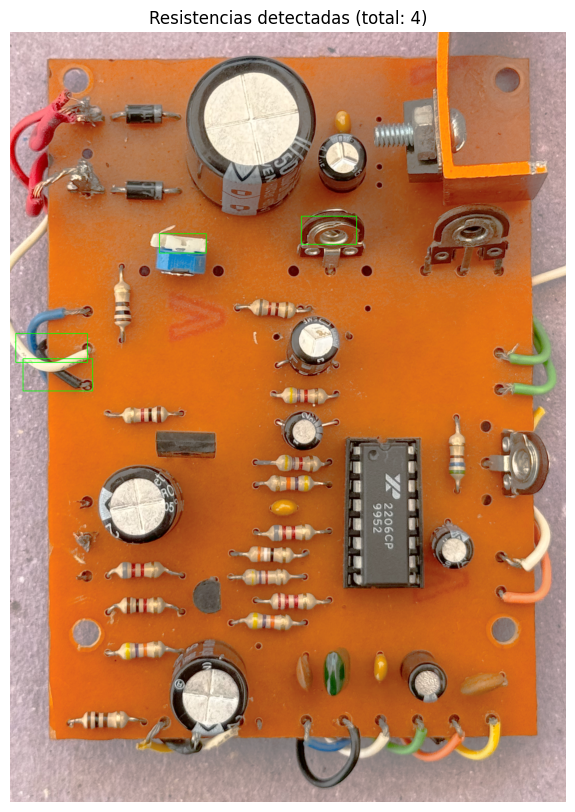

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_color = cv2.imread('TP2-PDI-/placa.png')
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

#Convertir a escala de grises,

img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

#Aplicar filtro Gaussiano para suavizar detalles menores,

img_blur = cv2.GaussianBlur(img_gray, (11, 11), 0)

#Detectar bordes con Canny,

edges = cv2.Canny(img_blur, threshold1=50, threshold2=150)

#Umbralizar para obtener binaria (0 y 255),

_, binary = cv2.threshold(edges, 1, 255, cv2.THRESH_BINARY)

#Encontrar componentes conectados,

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary, connectivity=8)

#Dibujar solo resistencias detectadas,

output_img = img_color.copy()
resistencias = []

for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    aspect_ratio = w / h if h != 0 else 0

    # Heurística para resistencias: forma alargada y tamaño coherente
    if 1.5 < aspect_ratio < 6 and 330 < area < 490:
        resistencias.append((x, y, w, h))
        cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

#Mostrar resultados
plt.figure(figsize=(10, 10))
plt.imshow(output_img)
plt.title(f"Resistencias detectadas (total: {len(resistencias)})")
plt.axis("off")
plt.show()

In [ ]:
# PROBLEMA 2
# transformacion geometrica
# detectar colores

In [ ]:
# Informe 
# el resultado para las 10 resistencias
# explicar pasos intermedios
# imagenes (si se hizo canny mostrar pasos intermedios)